In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import math
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_excel(r"D:\Data Science\DSML_UNext\DSML_Assignments\STATS\Assignment\Case Study_1 dataset.xlsx")
df

,GRIP,ARM,RATINGS,SIMS
0,105.5,80.5,31.8,1.18
1,106.5,93.0,39.8,0.94
2,94.0,81.0,46.8,0.84
3,90.5,33.5,52.2,-2.45
4,104.0,47.5,31.2,1.00
...,...,...,...,...
270,105.0,73.0,51.4,-0.15
271,113.0,87.0,49.1,-0.25
272,133.5,96.5,44.6,2.27
273,89.5,63.5,37.8,-0.93


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GRIP     275 non-null    float64
 1   ARM      275 non-null    float64
 2   RATINGS  275 non-null    float64
 3   SIMS     275 non-null    float64
dtypes: float64(4)
memory usage: 8.7 KB


In [5]:
df['GRIP']

0      105.5
1      106.5
2       94.0
3       90.5
4      104.0
       ...  
270    105.0
271    113.0
272    133.5
273     89.5
274     95.0
Name: GRIP, Length: 275, dtype: float64

<Axes: xlabel='GRIP', ylabel='Density'>

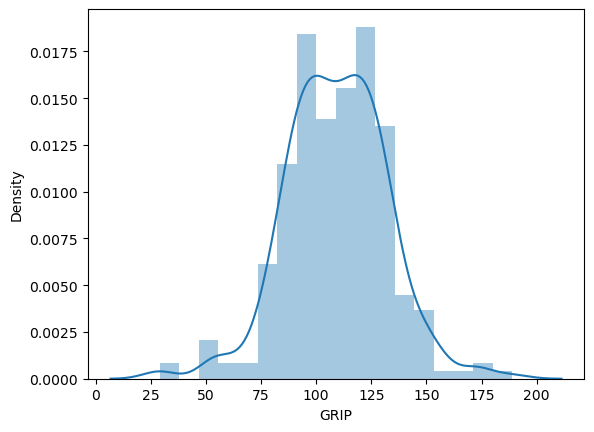

In [6]:
sns.distplot(df['GRIP'])

<Axes: xlabel='GRIP', ylabel='Count'>

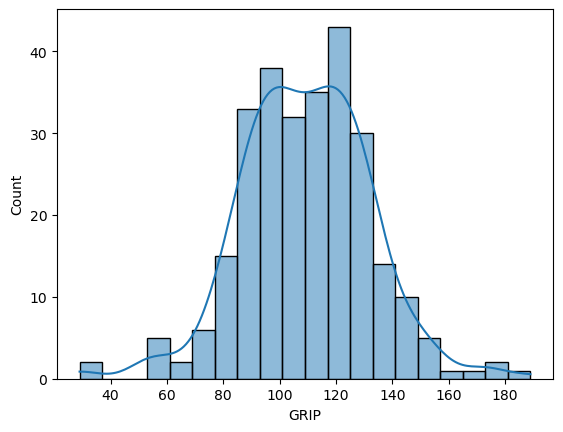

In [7]:
sns.histplot(df['GRIP'], kde=True, bins=20)

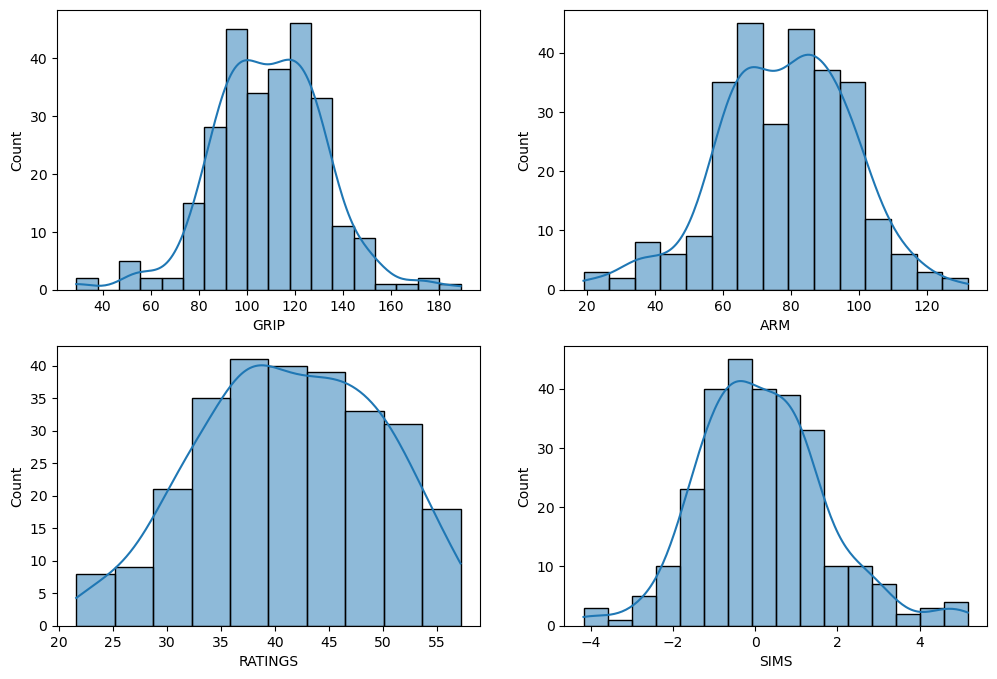

In [8]:
plt.figure(figsize=(12,8))

for i in range(len(df.columns)):
    plt.subplot(2,2,i+1)
    column_name = df.columns[i]
    sns.histplot(df[column_name], kde=True)

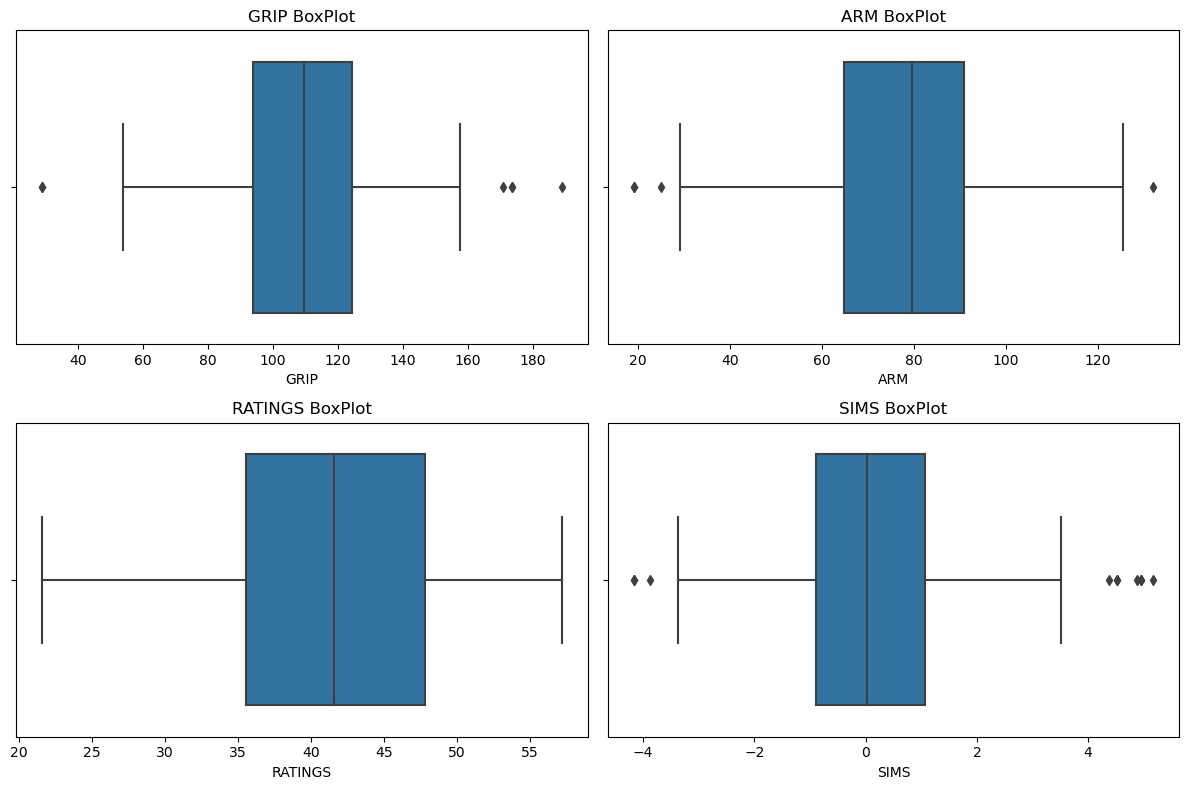

In [9]:
plt.figure(figsize=(12,8))

for i in range(len(df.columns)):
    plt.subplot(2,2,i+1)
    column_name = df.columns[i]
    sns.boxplot(x=df[column_name])
    plt.title(f"{column_name} BoxPlot")
plt.tight_layout()

In [10]:
dict_wo_outliers = {}

for i in range(len(df.columns)):
    column_name = df.columns[i]
    
    q1 = np.quantile(df[column_name], q=0.25)
    q3 = np.quantile(df[column_name], q=0.75)
    iqr = q3-q1

    lower_thresh = q1-1.5*iqr
    upper_thresh = q3+1.5*iqr
    outliers = df[(df[column_name] < lower_thresh) | (df[column_name] > upper_thresh)]
    dict_wo_outliers[column_name]= df[(df[column_name] > lower_thresh) & (df[column_name] < upper_thresh)]
#   df_wo_outliers = df[(df[column_name] > lower_thresh) & (df[column_name] < upper_thresh)]
    
    print(f"Lower Threshold for {column_name.title()}: {lower_thresh}.")
    print(f"Upper Threshold for {column_name.title()}: {upper_thresh}.")
    print(f"No. of outliers in {column_name.title()}: {len(outliers)}.\n")

Lower Threshold for Grip: 48.25.
Upper Threshold for Grip: 170.25.
No. of outliers in Grip: 6.

Lower Threshold for Arm: 25.75.
Upper Threshold for Arm: 129.75.
No. of outliers in Arm: 4.

Lower Threshold for Ratings: 17.174999999999997.
Upper Threshold for Ratings: 66.175.
No. of outliers in Ratings: 0.

Lower Threshold for Sims: -3.83.
Upper Threshold for Sims: 4.01.
No. of outliers in Sims: 10.



In [11]:
df_grip_wo_outliers = pd.DataFrame(dict_wo_outliers['GRIP'])
df_grip_wo_outliers

,GRIP,ARM,RATINGS,SIMS
0,105.5,80.5,31.8,1.18
1,106.5,93.0,39.8,0.94
2,94.0,81.0,46.8,0.84
3,90.5,33.5,52.2,-2.45
4,104.0,47.5,31.2,1.00
...,...,...,...,...
270,105.0,73.0,51.4,-0.15
271,113.0,87.0,49.1,-0.25
272,133.5,96.5,44.6,2.27
273,89.5,63.5,37.8,-0.93


In [12]:
df_arm_wo_outliers = pd.DataFrame(dict_wo_outliers['ARM'])
df_arm_wo_outliers

,GRIP,ARM,RATINGS,SIMS
0,105.5,80.5,31.8,1.18
1,106.5,93.0,39.8,0.94
2,94.0,81.0,46.8,0.84
3,90.5,33.5,52.2,-2.45
4,104.0,47.5,31.2,1.00
...,...,...,...,...
270,105.0,73.0,51.4,-0.15
271,113.0,87.0,49.1,-0.25
272,133.5,96.5,44.6,2.27
273,89.5,63.5,37.8,-0.93


In [13]:
testing_data = df_grip_wo_outliers['GRIP'].head(188)
testing_data

0      105.5
1      106.5
2       94.0
3       90.5
4      104.0
       ...  
187     94.5
188     90.5
189    111.5
190    111.0
191    119.0
Name: GRIP, Length: 188, dtype: float64

#### Hypothesis Framing for 2 sided t-test

- H0: The sample mean is equal to the population mean
- Ha: The sample mean is different from the population mean

In [14]:
pop_mean = df_grip_wo_outliers['GRIP'].mean()
pop_mean

108.82156133828997

In [15]:
# Calculating the p-value.

alpha = 0.05
t_cal,pval = stats.ttest_1samp(testing_data, popmean=108.82)

print(f"T calculated: {t_cal}.")
print(f"P Value: {pval}.\n")

if pval<alpha:
    print("There is sufficient statistical evidence to reject the Null Hypothesis.")
else:
    print("There is sufficient statistical evidence to fail to reject the Null Hypothesis.")

T calculated: -0.19795712001867077.
P Value: 0.8432936402213334.

There is sufficient statistical evidence to fail to reject the Null Hypothesis.


In [16]:
# Calculating the t critical and compairing it with t calculated

lower_t = stats.t.ppf(q=0.025, df=187)
upper_t = stats.t.ppf(q=0.975, df=187)

print(f"Lower t value: {lower_t}.")
print(f"Upper t value: {upper_t}.\n")


if t_cal<lower_t:
    print("There is sufficient statistical evidence to reject the Null Hypothesis.")
else:
    print("There is sufficient statistical evidence to fail to reject the Null Hypothesis.")

Lower t value: -1.9727310334056907.
Upper t value: 1.9727310334056902.

There is sufficient statistical evidence to fail to reject the Null Hypothesis.


#### Hypothesis Testing for One Sided t-test

- H0: The sample mean is lesser than or equal to the population mean.
- Ha: The sample mean is greater than the population mean.

#### Right Tailed Test

In [17]:
#Using p value method

t_cal, pval = stats.ttest_1samp(testing_data, popmean=108.82, alternative='greater')


print(f"T calculated: {t_cal}.")
print(f"P Value: {pval}.\n")

if pval<alpha:
    print("There is sufficient statistical evidence to reject the Null Hypothesis.")
else:
    print("There is sufficient statistical evidence to fail to reject the Null Hypothesis.")

T calculated: -0.19795712001867077.
P Value: 0.5783531798893333.

There is sufficient statistical evidence to fail to reject the Null Hypothesis.


In [18]:
#Using t-score method

t_cri = stats.t.ppf(q=0.975, df=187)

print(f"T critical is {t_cri}.\n")

if t_cal>t_cri:
    print("There is sufficient statistical evidence to reject the Null Hypothesis.")
else:
    print("There is sufficient statistical evidence to fail to reject the Null Hypothesis.")

T critical is 1.9727310334056902.

There is sufficient statistical evidence to fail to reject the Null Hypothesis.


#### Left Tailed Test

In [19]:
# Using p value method

t_cal, pval = stats.ttest_1samp(testing_data, popmean=108.82, alternative='less')


print(f"T calculated: {t_cal}.")
print(f"P Value: {pval}.\n")

if pval<alpha:
    print("There is sufficient statistical evidence to reject the Null Hypothesis.")
else:
    print("There is sufficient statistical evidence to fail to reject the Null Hypothesis.")

T calculated: -0.19795712001867077.
P Value: 0.4216468201106667.

There is sufficient statistical evidence to fail to reject the Null Hypothesis.


In [20]:
# Using t score method

t_cri = stats.t.ppf(q=0.05, df=187)

print(f"T critical is {t_cri}.\n")

if t_cal<t_cri:
    print("There is sufficient statistical evidence to reject the Null Hypothesis.")
else:
    print("There is sufficient statistical evidence to fail to reject the Null Hypothesis.")

T critical is -1.6530428889457813.

There is sufficient statistical evidence to fail to reject the Null Hypothesis.


- Since all the test results are the same i.e We fail to reject the Null Hypothesis.
- This means that we can say the sample mean is the same as the population mean with a significance level of 5%.

#### Calculating Confidence Intervals

In [25]:
se = testing_data.std()/math.sqrt(len(testing_data))

lower_range, upper_range = stats.t.interval(alpha=0.95, df=187, loc=testing_data.mean(), scale=se)

print(f"Lower Range: {lower_range}.")
print(f"Upper Range: {upper_range}.")

Lower Range: 105.51520115519503.
Upper Range: 111.52203288735816.


#### We can say with 95% Confidence that the population mean lies between 105.52 and 111.52